In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['STF_CFC11', 'STF_CFC12']

In [4]:
experiment = 'historical'
ds_expr = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment)
print(ds_expr)
ds_expr_ann = esmlab_wrap.compute_ann_mean(ds_expr)
print(ds_expr_ann)

entering _tseries_gen for STF_CFC12
['/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.011/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.011.pop.h.STF_CFC12.185001-189912.nc', '/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.011/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.011.pop.h.STF_CFC12.190001-194912.nc', '/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.011/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.011.pop.h.STF_CFC12.195001-199912.nc', '/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.011/ocn/proc/tseries/month_1/b.e21.BHIST.f09_g17.CMIP6-historical.011.pop.h.STF_CFC12.200001-201412.nc']
LocalCluster('tcp://127.0.0.1:42119', workers=9, ncores=72)
<Client: scheduler='tcp://127.0.0.1:42119' processes=9 cores=72>
<xarray.Dataset>
Dimensions:     (d2: 2, ensemble: 11, region: 4, time: 1980)
Coordinates:
  * time       

In [5]:
# add cummulate flux vars to datasets
for ds in [ds_expr_ann]:
    for varname in varnames:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.name = varname+'_CUM'
        da.attrs['units'] = 'Gg'
        ds[da.name] = da

print(ds_expr_ann)

<xarray.Dataset>
Dimensions:        (d2: 2, ensemble: 11, region: 4, time: 165)
Coordinates:
  * region         (region) object 'Global' 'SH_mid_lat' 'low_lat' 'NH_mid_lat'
  * time           (time) object 1850-07-01 17:05:00 ... 2014-07-01 17:00:00
Dimensions without coordinates: d2, ensemble
Data variables:
    time_bound     (d2, time) object 1850-01-01 02:00:00 ... 2015-01-01 00:00:00
    STF_CFC11      (time, region, ensemble) float64 0.0 0.0 ... 0.3817 0.3746
    STF_CFC12      (time, region, ensemble) float64 0.0 0.0 ... 0.2008 0.1962
    STF_CFC11_CUM  (time, region, ensemble) float64 0.0 0.0 0.0 ... 35.51 35.63
    STF_CFC12_CUM  (time, region, ensemble) float64 0.0 0.0 0.0 ... 16.51 16.55
Attributes:
    history:  \n2019-08-16 06:58:30.439287 esmlab.resample(<DATASET>, freq="a...


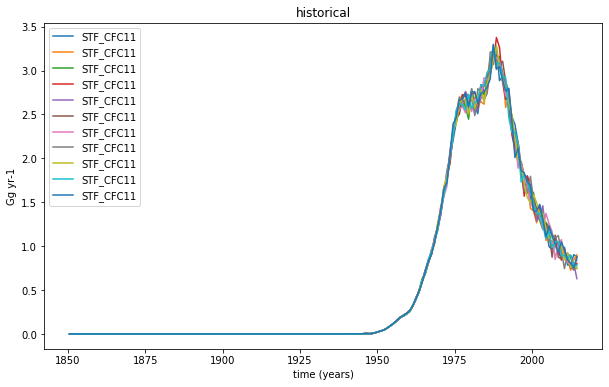

In [6]:
tseries_mod.tseries_plot_1ds(ds_expr_ann, ['STF_CFC11'], title=experiment, region_val='Global')

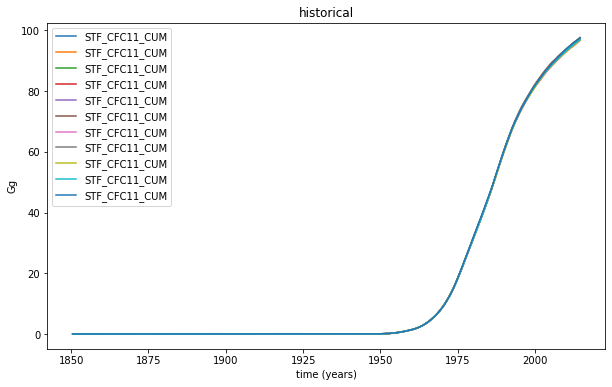

In [7]:
tseries_mod.tseries_plot_1ds(ds_expr_ann, ['STF_CFC11_CUM'], title=experiment, region_val='Global')

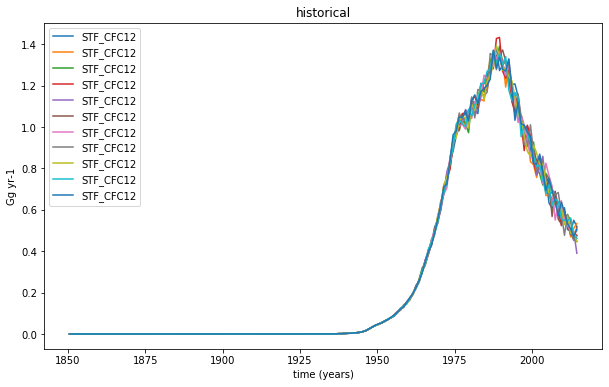

In [8]:
tseries_mod.tseries_plot_1ds(ds_expr_ann, ['STF_CFC12'], title=experiment, region_val='Global')

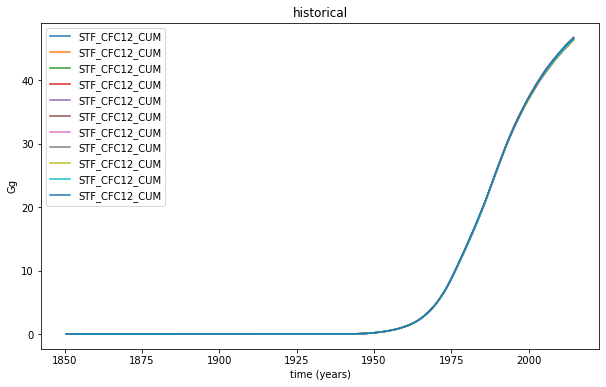

In [9]:
tseries_mod.tseries_plot_1ds(ds_expr_ann, ['STF_CFC12_CUM'], title=experiment, region_val='Global')